In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

import joblib

import warnings
warnings.filterwarnings('ignore')

In [8]:
sks=pd.read_csv('skyserver.csv')
sks.head(10)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,STAR,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400


In [7]:
sks.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [9]:
#checking for null values
sks.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [10]:
sksr=sks.copy()

In [11]:
#Checking for missing values
sks=sks.replace('?',np.nan)

In [12]:
sks.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [13]:
sks.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [14]:
sks.corr()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


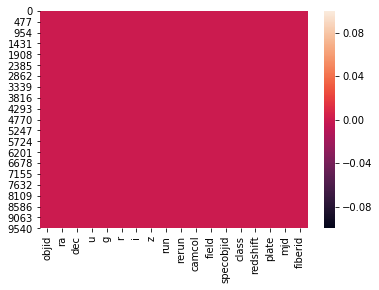

In [15]:
sbn.heatmap(sks.isnull())

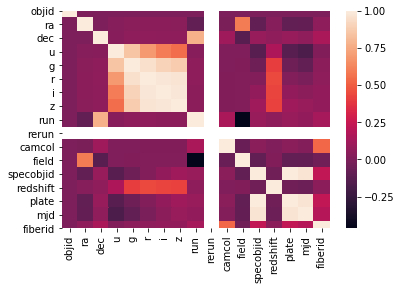

In [16]:
sbn.heatmap(sks.corr())

In [17]:
sks['objid'].unique()

array([1.23765e+18])

In [19]:
sks.nunique()

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64

In [20]:
sks['rerun'].unique()

array([301], dtype=int64)

In [21]:
sks=sks.drop(['objid','rerun'],axis=1)

In [22]:
sks.sample(5)

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
8647,186.761654,-0.323730,19.37790,17.59908,16.49359,16.01483,15.60621,752,3,289,3.254360e+17,GALAXY,0.116104,289,51990,186
9460,184.786381,-0.598796,19.21304,17.50818,16.84819,16.46602,16.22615,756,2,461,3.243100e+17,GALAXY,0.069230,288,52000,184
9223,165.209504,0.678055,17.94924,16.65389,16.75037,16.85024,16.90596,756,5,330,3.119920e+17,STAR,0.000121,277,51908,428
9590,170.105196,1.183497,18.79839,16.90130,15.98378,15.61040,15.28429,756,6,363,3.153550e+17,GALAXY,0.104988,280,51612,374
6939,203.054951,1.128382,18.83753,17.84148,17.58784,17.29840,17.22349,1404,6,27,3.356330e+17,GALAXY,0.073045,298,51955,418


In [24]:
sks.groupby(['camcol'])['class'].value_counts()

camcol  class 
1       GALAXY    687
        STAR      497
        QSO       114
2       GALAXY    818
        STAR      758
        QSO       136
3       GALAXY    752
        STAR      690
        QSO       118
4       GALAXY    901
        STAR      772
        QSO       161
5       GALAXY    957
        STAR      700
        QSO       170
6       GALAXY    883
        STAR      735
        QSO       151
Name: class, dtype: int64

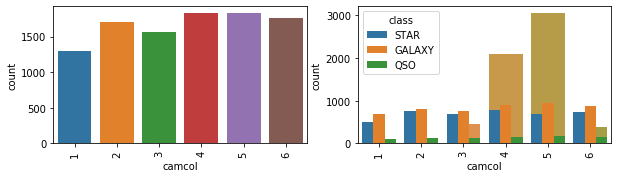

In [30]:
column=sks[['camcol','run']]
plt.figure(figsize=(10,60))
for ind,col in enumerate(column.columns):
    plt.subplot(20,2,ind+1)
    plt.xticks(rotation=90)
    sbn.countplot(x=column[col],data=column)
sbn.countplot(x='camcol',hue='class',data=sks)

In [36]:
#checking the relation withrespect to class 
sks.groupby('class')['run'].value_counts()

class   run 
GALAXY  756     1550
        752      901
        1345     543
        1140     345
        745      230
                ... 
STAR    1336      28
        308       27
        1402      12
        1411       2
        1356       1
Name: run, Length: 62, dtype: int64

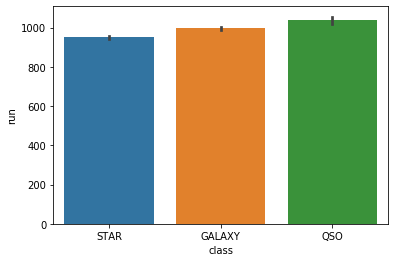

In [39]:
sbn.barplot('class','run',data=sks)

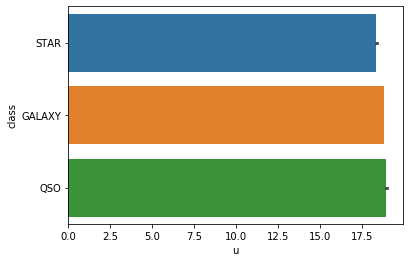

In [41]:
sbn.barplot('u','class',data=sks)

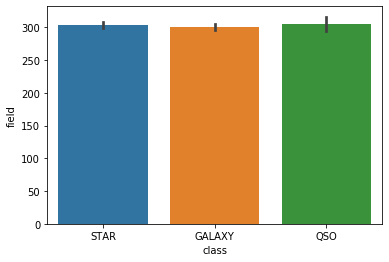

In [42]:
sbn.barplot('class','field',data=sks)    

In [47]:
sks.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [49]:
sks['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

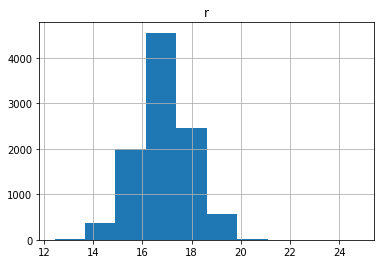

In [52]:
#The x axis denotes count and y axis denotes frequency

sks.hist(column='r')
plt.show()

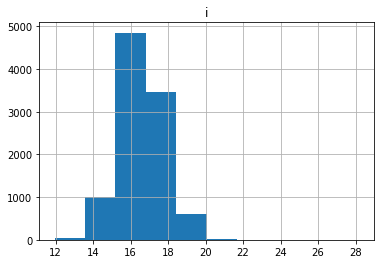

In [53]:
sks.hist(column='i')
plt.show()

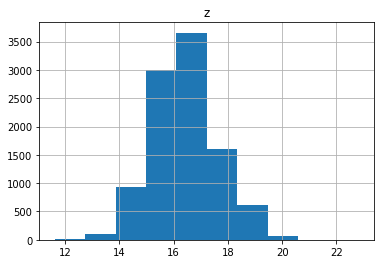

In [54]:
sks.hist(column='z')
plt.show()

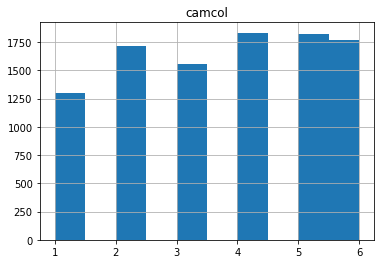

In [55]:
sks.hist(column='camcol')
plt.show()

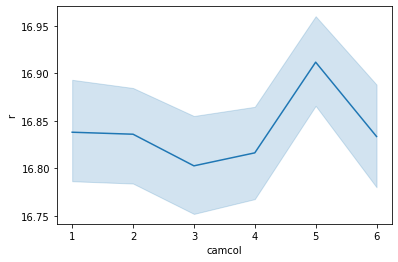

In [58]:
sbn.lineplot('camcol','r',data=sks)

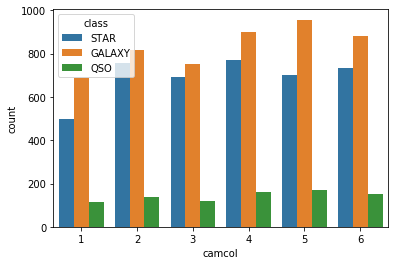

In [60]:
sbn.countplot('camcol',hue='class',data=sks)

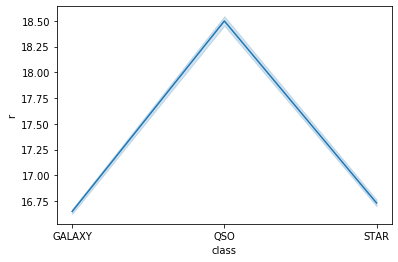

In [65]:
sbn.lineplot('class','r',data=sks)

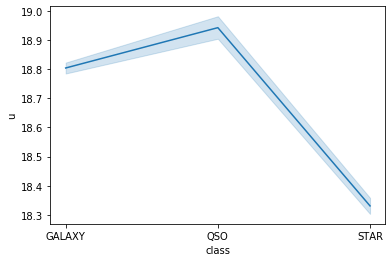

In [66]:
sbn.lineplot('class','u',data=sks)

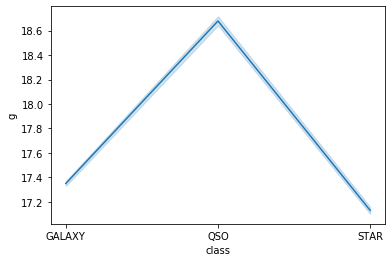

In [67]:
sbn.lineplot('class','g',data=sks)

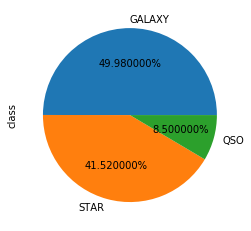

In [70]:
sks['class'].value_counts().plot(kind='pie',autopct='%1f%%')

It seems most of the dataset contains galaxy

In [72]:
x=sks.drop(['class','specobjid'],axis=1)
x.head()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,0.000590,3306,54922,512


In [73]:
y=sks['class']
y=pd.DataFrame(y,columns=['class'])

In [74]:
y.head()

,class
0,STAR
1,STAR
2,GALAXY
3,STAR
4,STAR


In [77]:

#Scaling the features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [78]:
#Encoding label so that system can interpret

le=LabelEncoder()
y=le.fit_transform(y)
y=pd.DataFrame(y,columns=['class'])

In [79]:
y.head()

,class
0,2
1,2
2,0
3,2
4,2


0-Galaxy
1-Qso
2=star

In [80]:
#Seperating train test and finding maximum accuracy,random state
def accuracy(model,x,y):
    max_acc=0
    for rst in range(40,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rst,test_size=.22)
        model.fit(x_train,y_train)
        predy=model.predict(x_test)
        acc=accuracy_score(y_test,predy)
        print('Accuracy is',acc,'for the random state',rst)
        if acc>max_acc:
            max_acc=acc
            f_rst=rst
    print('Maximum accuracy is ',max_acc,'and acquired at',f_rst)
    return f_rst


In [81]:
lre=LogisticRegression()
accuracy(lre,x,y)

Accuracy is 0.9636363636363636 for the random state 40
Accuracy is 0.9577272727272728 for the random state 41
Accuracy is 0.9531818181818181 for the random state 42
Accuracy is 0.9513636363636364 for the random state 43
Accuracy is 0.9513636363636364 for the random state 44
Accuracy is 0.9636363636363636 for the random state 45
Accuracy is 0.9577272727272728 for the random state 46
Accuracy is 0.9545454545454546 for the random state 47
Accuracy is 0.9486363636363636 for the random state 48
Accuracy is 0.9645454545454546 for the random state 49
Accuracy is 0.9581818181818181 for the random state 50
Accuracy is 0.9595454545454546 for the random state 51
Accuracy is 0.9518181818181818 for the random state 52
Accuracy is 0.9536363636363636 for the random state 53
Accuracy is 0.9536363636363636 for the random state 54
Accuracy is 0.9522727272727273 for the random state 55
Accuracy is 0.9504545454545454 for the random state 56
Accuracy is 0.9590909090909091 for the random state 57
Accuracy i

49

In [82]:
kn=KNeighborsClassifier(n_neighbors=3)
accuracy(kn,x,y)

Accuracy is 0.9086363636363637 for the random state 40
Accuracy is 0.9004545454545455 for the random state 41
Accuracy is 0.8972727272727272 for the random state 42
Accuracy is 0.9063636363636364 for the random state 43
Accuracy is 0.9018181818181819 for the random state 44
Accuracy is 0.9113636363636364 for the random state 45
Accuracy is 0.9054545454545454 for the random state 46
Accuracy is 0.9045454545454545 for the random state 47
Accuracy is 0.9004545454545455 for the random state 48
Accuracy is 0.9104545454545454 for the random state 49
Accuracy is 0.9036363636363637 for the random state 50
Accuracy is 0.9040909090909091 for the random state 51
Accuracy is 0.9036363636363637 for the random state 52
Accuracy is 0.899090909090909 for the random state 53
Accuracy is 0.9054545454545454 for the random state 54
Accuracy is 0.9040909090909091 for the random state 55
Accuracy is 0.9 for the random state 56
Accuracy is 0.9177272727272727 for the random state 57
Accuracy is 0.904090909090

57

In [86]:
rfc=RandomForestClassifier(n_estimators=10)
accuracy(rfc,x,y)

Accuracy is 0.9886363636363636 for the random state 40
Accuracy is 0.9877272727272727 for the random state 41
Accuracy is 0.9890909090909091 for the random state 42
Accuracy is 0.9886363636363636 for the random state 43
Accuracy is 0.9890909090909091 for the random state 44
Accuracy is 0.9904545454545455 for the random state 45
Accuracy is 0.9881818181818182 for the random state 46
Accuracy is 0.9854545454545455 for the random state 47
Accuracy is 0.9840909090909091 for the random state 48
Accuracy is 0.9886363636363636 for the random state 49
Accuracy is 0.9845454545454545 for the random state 50
Accuracy is 0.9877272727272727 for the random state 51
Accuracy is 0.9877272727272727 for the random state 52
Accuracy is 0.9863636363636363 for the random state 53
Accuracy is 0.985 for the random state 54
Accuracy is 0.9818181818181818 for the random state 55
Accuracy is 0.9881818181818182 for the random state 56
Accuracy is 0.9904545454545455 for the random state 57
Accuracy is 0.989090909

59

In [87]:
dtc=DecisionTreeClassifier(max_leaf_nodes=4)
accuracy(dtc,x,y)

Accuracy is 0.9895454545454545 for the random state 40
Accuracy is 0.9877272727272727 for the random state 41
Accuracy is 0.9872727272727273 for the random state 42
Accuracy is 0.9881818181818182 for the random state 43
Accuracy is 0.9877272727272727 for the random state 44
Accuracy is 0.9895454545454545 for the random state 45
Accuracy is 0.9904545454545455 for the random state 46
Accuracy is 0.985909090909091 for the random state 47
Accuracy is 0.985 for the random state 48
Accuracy is 0.9872727272727273 for the random state 49
Accuracy is 0.9845454545454545 for the random state 50
Accuracy is 0.99 for the random state 51
Accuracy is 0.9854545454545455 for the random state 52
Accuracy is 0.9877272727272727 for the random state 53
Accuracy is 0.9831818181818182 for the random state 54
Accuracy is 0.9822727272727273 for the random state 55
Accuracy is 0.985909090909091 for the random state 56
Accuracy is 0.99 for the random state 57
Accuracy is 0.9890909090909091 for the random state 5

59

In [88]:
#Cross validation

from sklearn.metrics import confusion_matrix,classification_report
rfc=RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=59,test_size=.22)
rfc.fit(x_train,y_train)
predy=rfc.predict(x_test)
acc=accuracy_score(y_test,predy)
print('Accuracy is',acc)
print('confusion matrix',confusion_matrix(y_test,predy))
print('Classification report',classification_report(y_test,predy))

Accuracy is 0.9922727272727273
confusion matrix [[1106    2    6]
 [   9  171    0]
 [   0    0  906]]
Classification report               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1114
           1       0.99      0.95      0.97       180
           2       0.99      1.00      1.00       906

    accuracy                           0.99      2200
   macro avg       0.99      0.98      0.99      2200
weighted avg       0.99      0.99      0.99      2200



In [90]:
#Cross validation
cv=cross_val_score(rfc,x_train,y_train,cv=5,scoring='accuracy')
print('mean accuracy:',cv.mean())
print("standard deviation",cv.std())


mean accuracy: 0.9858972691084802
standard deviation 0.0012183539546422551


In [92]:
#Saving predictions

predc=pd.DataFrame(predy,columns=['class'])
predc.to_csv('skypredctions.csv')

In [94]:
#saving model

joblib.dump(rfc,'skypredict.pkl')

['skypredict.pkl']